### Importing Libraries and setting env variables

In [5]:
import os
from groq import Groq
from dotenv import load_dotenv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

load_dotenv()

api_key = os.getenv("GROQ_API_KEY")
client = Groq(api_key=api_key)

### Prompting Model

In [6]:
def get_code_from_model(query):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a professional Python developer. "
                    "Answer all queries by generating only valid and clean Python code. "
                    "Do not provide any explanation or comments.\n\n"
                    "You have access to a dataset stored in 'household_power_consumption.csv'. "
                    "Load it in a DataFrame `df` as follows:\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)\n\n"
                    "Clean it using:\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n\n"
                    "Columns in dataframe `df` are :  'Global_active_power', 'Global_reactive_power', 'Voltage', "
                    "'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'. "
                    "The index is 'datetime' "
                    "All columns have floating point values and datetime is the index."
                    "Give me full code and start from loading the data."
                )
            },
            {
                "role": "user",
                "content": query,
            }
        ],
        model="gemma2-9b-it",
        temperature=0,
        top_p=1,
    )

    response = chat_completion.choices[0].message.content
    return response

### 1. What was the average active power consumption in March 2007?

In [7]:
question = "What was the average active power consumption in March 2007?"

response = get_code_from_model(question)

print(response)

```python
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df[df.index.month == 3].query('year == 2007')['Global_active_power'].mean() 
```


#### Running the code

In [8]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df[df.index.month == 3].query('year == 2007')['Global_active_power'].mean() 

UndefinedVariableError: name 'year' is not defined

### 2. What hour of the day had the highest power usage on Christmas 2006?

In [9]:
question = "What hour of the day had the highest power usage on Christmas 2006?"

response = get_code_from_model(question)

print(response)

```python
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df_christmas = df[df.index.year == 2006][df.index.month == 12]
hour = df_christmas['Global_active_power'].idxmax().hour
print(hour)
```


#### Running the code

In [10]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df_christmas = df[df.index.year == 2006][df.index.month == 12]
hour = df_christmas['Global_active_power'].idxmax().hour
print(hour)

ValueError: Item wrong length 2049280 instead of 21992.

### 3. Compare energy usage (Global_active_power) on weekdays vs weekends.

In [11]:
question = "Compare energy usage (Global_active_power) on weekdays vs weekends."

response = get_code_from_model(question)

print(response)

```python
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df['weekday'] = df.index.weekday
weekday_energy = df[df['weekday'].isin([0, 1, 2, 3, 4])]['Global_active_power'].mean()
weekend_energy = df[df['weekday'].isin([5, 6])]['Global_active_power'].mean()
print(weekday_energy)
print(weekend_energy)
```


#### Running the code

In [12]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df['weekday'] = df.index.weekday
weekday_energy = df[df['weekday'].isin([0, 1, 2, 3, 4])]['Global_active_power'].mean()
weekend_energy = df[df['weekday'].isin([5, 6])]['Global_active_power'].mean()
print(weekday_energy)
print(weekend_energy)

1.0354720516747509
1.234232176791304


### 4. Find days where energy consumption exceeded 5 kWh.

In [13]:
question = "Find days where energy consumption exceeded 5 kWh."

response = get_code_from_model(question)

print(response)

```python
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df[df['Global_active_power'] > 5].index.date
```


#### Running the code

In [4]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df[df['Global_active_power'] > 5].index.date.shape

/tmp/ipykernel_242981/2920167183.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
/tmp/ipykernel_242981/2920167183.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
/tmp/ipykernel_242981/2920167183.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfi

(17547,)

### 5. Plot the energy usage trend for the first week of January 2007.

In [15]:
question = "Plot the energy usage trend for the first week of January 2007.."

response = get_code_from_model(question)

print(response)

```python
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df = df[df.index.year == 2007][df.index.month == 1][df.index.day <= 7]
plt.plot(df['Global_active_power'])
plt.show()
```


#### Running the code

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df = df[df.index.year == 2007][df.index.month == 1][df.index.day <= 7]
plt.plot(df['Global_active_power'])
plt.show()

/tmp/ipykernel_242981/4235430443.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
/tmp/ipykernel_242981/4235430443.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
/tmp/ipykernel_242981/4235430443.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfi

ValueError: Item wrong length 2049280 instead of 521669.

### 6. Find the average voltage for each day of the first week of February 2007.

In [17]:
question = "Find the average voltage for each day of the first week of February 2007"

response = get_code_from_model(question)

print(response)

```python
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df.loc[df.index.year == 2007].resample('D').mean()['Voltage']
```


#### Running the code

In [18]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df.loc[df.index.year == 2007].resample('D').mean()['Voltage']

datetime
2007-01-01    240.128979
2007-01-02    241.943778
2007-01-03    243.557090
2007-01-04    239.750299
2007-01-05    240.495764
                 ...    
2007-12-27    242.111611
2007-12-28    242.284479
2007-12-29    240.550667
2007-12-30    242.099174
2007-12-31    241.094792
Freq: D, Name: Voltage, Length: 365, dtype: float64

### 7. What is the correlation between global active power and sub-metering values?

In [19]:
question = "What is the correlation between global active power and sub-metering values?"

response = get_code_from_model(question)

print(response)

```python
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
correlation = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(correlation)
```


#### Running the code

In [20]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
correlation = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(correlation)

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


### 7.1 What is the correlation between global active power and sub-metering values? Give me a plot also

In [21]:
question = "What is the correlation between global active power and sub-metering values? Give me a plot also"

response = get_code_from_model(question)

print(response)

```python
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

correlations = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(correlations)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.plot(df.index, df['Sub_metering_1'], label='Sub Metering 1')
plt.plot(df.index, df['Sub_metering_2'], label='Sub Metering 2')
plt.plot(df.index, df['Sub_metering_3'], label='Sub Metering 3')
plt.xlabel('Datetime')
plt.ylabel('Power (W)')
plt.title('Correlation of Global Active Power with Sub-Metering Values')
plt.legend()
plt.show()
```


#### Running the code

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


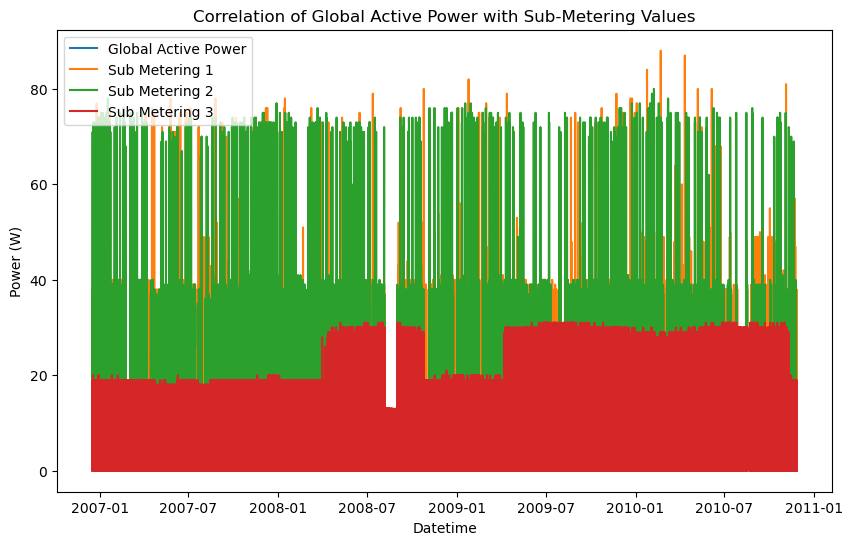

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

correlations = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(correlations)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.plot(df.index, df['Sub_metering_1'], label='Sub Metering 1')
plt.plot(df.index, df['Sub_metering_2'], label='Sub Metering 2')
plt.plot(df.index, df['Sub_metering_3'], label='Sub Metering 3')
plt.xlabel('Datetime')
plt.ylabel('Power (W)')
plt.title('Correlation of Global Active Power with Sub-Metering Values')
plt.legend()
plt.show()